In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

**Importing the dataset**

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [4]:
male = pd.get_dummies(df['Gender'], drop_first= True)

In [5]:
df_new = pd.concat([df, male], axis = 1)

In [6]:
df_new.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1


In [7]:
df_new.drop(['User ID', 'Gender'], axis = 1, inplace = True)

In [8]:
df_new.head(2)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1


**Splitting the dataset into the Training set and Test set**

In [9]:
X = df_new.drop(['Purchased'], axis = 1).copy()
y = df_new['Purchased'].copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Feature Scaling**

In [11]:
sc = MinMaxScaler()

In [12]:
X_train_sc = sc.fit_transform(X_train)

**Fitting SVM to the Training set**

In [13]:
svm = SVC(probability= True).fit(X_train_sc, y_train)

**Predicting the Test set results**

In [14]:
X_test_sc = sc.transform(X_test)

In [15]:
pred = svm.predict(X_test_sc)

**Making the Confusion Matrix**

In [16]:
print(confusion_matrix(y_test, pred))

[[55  3]
 [ 2 20]]


In [17]:
print(accuracy_score(y_test, pred))

0.9375


**Visualising the Training set results**

In [18]:
train_pred = svm.predict(X_train_sc)

In [19]:
accuracy_score(train_pred, y_train)

0.896875

In [20]:
# to generate roc curve
def generate_roc_curve(model, X_train_sc1):
    plt.figure(figsize = (10, 7))
    y_pred_prob = model.predict_proba(X_train_sc1)[:, 1]
    roc_score = roc_auc_score(y_train, y_pred_prob)
    fpr, tpr, threshold = roc_curve(y_train, y_pred_prob)
    plt.plot(fpr, tpr, color = 'red', label = 'ROC Score :'+ str(roc_score))
    plt.title('ROC Curve on Train set', size = 15)
    plt.legend(loc = 4)
    plt.show()

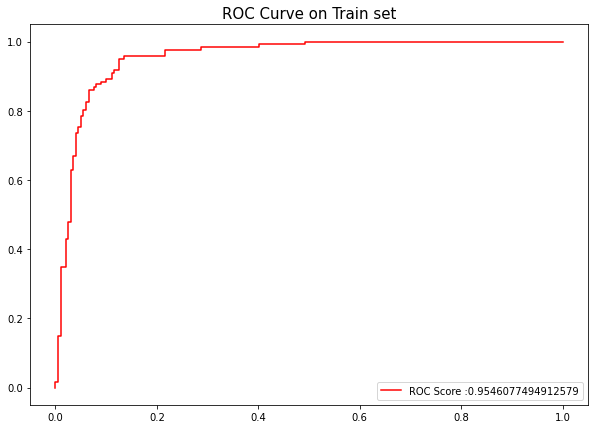

In [21]:
generate_roc_curve(svm, X_train_sc)

**Visualising the Test set results**

In [22]:
# to generate roc curve
def generate_roc_curve(model, X_test):
    plt.figure(figsize = (10, 7))
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    roc_score = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color = 'red', label = 'ROC Score :'+ str(roc_score))
    plt.title('ROC Curve on Test set', size = 15)
    plt.legend(loc = 4)
    plt.show()

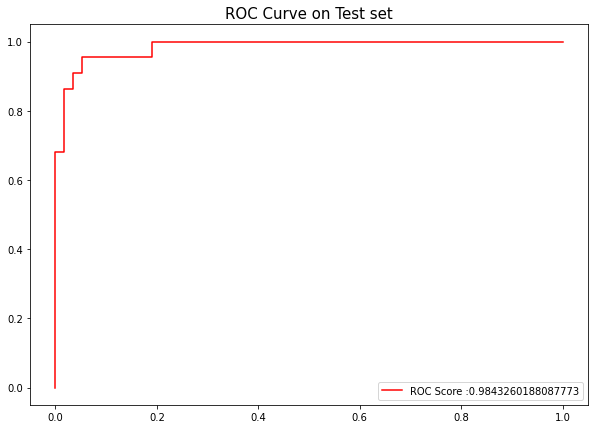

In [23]:
generate_roc_curve(svm, X_test_sc)

---